# UTS - Klasifikasi Abstrak PTA

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd

## Load Data Abstrak

In [9]:
df = pd.read_excel('/content/drive/MyDrive/prosainsdata/LabeledPtaFix.xlsx')
# df = df.drop(['Unnamed: 0.1'], axis=1)
df.head()

,NIM,Nama,Judul,Abstrak,Kelas
0,40411100468,A.Ubaidillah S.Kom,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,40411100476,"M. Basith Ardianto,",APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,RPL
2,70411100070,Heri Supriyanto,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Komputasi
3,80411100115,Septian Rahman Hakim,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Komputasi
4,70411100007,Adi Chandra Laksono,Gerak Pekerja Pada Game Real Time Strategy Men...,Gerak pekerja ada pada game yang memiliki genr...,RPL


## Eksplorasi Data

In [10]:
df.isnull().sum()

NIM        0
Nama       0
Judul      0
Abstrak    3
Kelas      0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

NIM        0
Nama       0
Judul      0
Abstrak    0
Kelas      0
dtype: int64

In [12]:
df.count()

NIM        795
Nama       795
Judul      795
Abstrak    795
Kelas      795
dtype: int64

In [13]:
df.tail()

,NIM,Nama,Judul,Abstrak,Kelas
793,160411100032,Rachmad Agung Pambudi,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Investasi saham selama ini memiliki resiko ker...,NLP
794,160411100182,Nadila Hidayanti,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Information Retrieval (IR) merupakan pengambil...,Komputasi
795,160411100077,Afni Sakinah,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Klasifikasi citra merupakan proses pengelompok...,Komputasi
796,160411100084,Friska Fatmawatiningrum,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Identifikasi atribut pejalan kaki merupakan sa...,NLP
797,160411100044,Dian Wibowo,DETEKSI OBJEK MANUSIA BERBASIS ONE STAGE DETEC...,Topik deteksi objek telah menarik perhatian ya...,Komputasi


In [14]:
# Jumlah data pada masing-masing label
df['Kelas'].value_counts()

Komputasi    417
RPL          254
NLP          124
Name: Kelas, dtype: int64

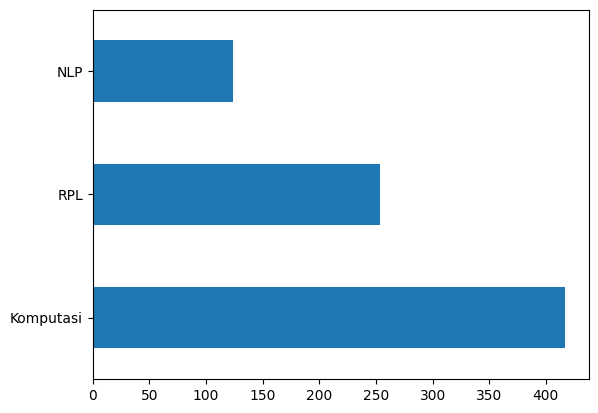

In [15]:
import matplotlib.pyplot as plt

df['Kelas'].value_counts().plot(kind='barh')
plt.show()

## Prepocessing

### Cleaning Text

In [16]:
import re, string

# Text Cleaning
def cleaning(text):
    # HTML Tag Removal
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [17]:
df['Judul'] = df['Judul'].apply(lambda x: cleaning(x))
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))

df.head()

,NIM,Nama,Judul,Abstrak,Kelas
0,40411100468,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,RPL
1,40411100476,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL
2,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi
3,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi
4,70411100007,Adi Chandra Laksono,gerak pekerja pada game real time strategy men...,gerak pekerja ada pada game yang memiliki genr...,RPL


In [18]:
# Export Hasil Cleaning
df.to_csv('pta-cleaned.csv')

### Hilangkan Value yang Kosong

In [19]:
# Ubah empty string menjadi NaN value
df = df.replace('', np.nan)

In [20]:
# Cek missing values
df.isnull().sum()

NIM        0
Nama       0
Judul      0
Abstrak    2
Kelas      0
dtype: int64

In [21]:
# Remove missing values
df.dropna(inplace=True)
len(df)

793

### Menghilangkan Duplikasi Data

In [22]:
# Cek apakah terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas
673,120411100015,Abdul Ainur Rofik,sistem pendukung keputusan pemilihan pemain bo...,peningkatan pembinaan permai bola voli terutam...,Komputasi


In [23]:
# Remove duplicates judul
df.drop_duplicates(subset=['Judul'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas


In [24]:
# Cek apakah terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas


In [25]:
# Hiilangkan duplikasi abstrak
df.drop_duplicates(subset=['Abstrak'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas


In [26]:
# Export Hasil Preprocessing
df.to_csv('preprocessed-pta.csv')

## Tokenisasi

In [27]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [28]:
from nltk.tokenize import word_tokenize

# Tokenizing Judul
df['judul_tokens'] = df['Judul'].apply(lambda x: word_tokenize(x))
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[perancangan, dan, implementasi, sistem, datab..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, dan, monitoring, jaringan,..."
2,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
3,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."
4,gerak pekerja pada game real time strategy men...,"[gerak, pekerja, pada, game, real, time, strat..."


In [29]:
# Tokenizing Abstrak
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den..."
2,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m..."
3,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ..."
4,gerak pekerja ada pada game yang memiliki genr...,"[gerak, pekerja, ada, pada, game, yang, memili..."


## Stop Words Removal

In [30]:
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['judul_tokens'] = df['judul_tokens'].apply(lambda x: [w for w in x if not w in stop_words])
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

In [31]:
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[perancangan, implementasi, sistem, database, ..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaringan, komp..."
2,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
3,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."
4,gerak pekerja pada game real time strategy men...,"[gerak, pekerja, game, real, time, strategy, f..."


In [32]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, lan..."
2,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, perguruan, kompleks, per..."
3,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, didunia, mu..."
4,gerak pekerja ada pada game yang memiliki genr...,"[gerak, pekerja, game, memiliki, genre, rts, r..."


## Stemming Data

In [33]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 4.8 MB/s eta 0:00:00


In [34]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [35]:
# Stemming judul
df['judul_tokens'] = df['judul_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/792 [00:00<?, ?it/s]

In [36]:
# Hasil stemming judul
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[ancang, implementasi, sistem, database, distr..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaring, komput..."
2,sistem pendukung keputusan optimasi penjadwala...,"[sistem, dukung, putus, optimasi, jadwal, mata..."
3,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, g..."
4,gerak pekerja pada game real time strategy men...,"[gerak, kerja, game, real, time, strategy, fin..."


In [37]:
# Stemming abstrak
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/792 [00:00<?, ?it/s]

In [38]:
# Hasil stemming abstrak
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[jalan, koneksi, jaring, komputer, lancar, gan..."
2,penjadwalan kuliah di perguruan tinggi merupak...,"[jadwal, kuliah, guru, kompleks, masalah, vari..."
3,seiring perkembangan teknologi yang ada diduni...,"[iring, kembang, teknologi, dunia, muncul, tek..."
4,gerak pekerja ada pada game yang memiliki genr...,"[gerak, kerja, game, milik, genre, rts, real, ..."


## Export Data yang telah Dibersihkan

In [39]:
df['judul_tokens'] = df['judul_tokens'].apply(lambda x: ' '.join(x))
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: ' '.join(x))

df.to_csv('cleaned-data.csv')

## Modelling

### Load Prepocessed Data

In [40]:
df = pd.read_csv('/content/cleaned-data.csv', index_col=0)
df.head()

,NIM,Nama,Judul,Abstrak,Kelas,judul_tokens,abstrak_tokens
0,40411100468,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,RPL,ancang implementasi sistem database distribusi...,sistem informasi akademik siakad sistem inform...
1,40411100476,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL,aplikasi kontrol monitoring jaring komputer ba...,jalan koneksi jaring komputer lancar ganggu ha...
2,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi,sistem dukung putus optimasi jadwal matakuliah...,jadwal kuliah guru kompleks masalah variabel t...
3,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi,sistem augmented reality animasi benda gerak f...,iring kembang teknologi dunia muncul teknologi...
4,70411100007,Adi Chandra Laksono,gerak pekerja pada game real time strategy men...,gerak pekerja ada pada game yang memiliki genr...,RPL,gerak kerja game real time strategy finite sta...,gerak kerja game milik genre rts real time str...


In [41]:
X = df['abstrak_tokens']

### Ekstraksi Fitur dan PCA

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(X)

X_tfidf.shape

(792, 5965)

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_tfidf.toarray())
X_pca.shape

(792, 10)

### Split Data

In [44]:
from sklearn.model_selection import train_test_split

X = X_pca
y = df['Kelas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training Model (Naive Bayes dan KNN)

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Naive Bayes

In [53]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

#### KNN

In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

#### Evaluasi Kinerja Model

In [55]:
print('Naive Bayes')
print(accuracy_score(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

print('\nKNN')
print(accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

Naive Bayes
0.680672268907563
[[73  5 35]
 [22 20  7]
 [ 5  2 69]]
              precision    recall  f1-score   support

   Komputasi       0.73      0.65      0.69       113
         NLP       0.74      0.41      0.53        49
         RPL       0.62      0.91      0.74        76

    accuracy                           0.68       238
   macro avg       0.70      0.65      0.65       238
weighted avg       0.70      0.68      0.67       238


KNN
0.680672268907563
[[93  9 11]
 [30 13  6]
 [20  0 56]]
              precision    recall  f1-score   support

   Komputasi       0.65      0.82      0.73       113
         NLP       0.59      0.27      0.37        49
         RPL       0.77      0.74      0.75        76

    accuracy                           0.68       238
   macro avg       0.67      0.61      0.61       238
weighted avg       0.68      0.68      0.66       238

